# AI Developer in Wonderland ! Late !! Always late !!!

## Contexte du projet

Vous ne révez plus ... Vous venez de faire le plein de ressources ... Aujourd'ui vous allez créer votre premier labyrinthe !

Un labyrinthe est un ensemble complexe de chemins tortueux, à embranchements multiples, dans lequel on peut tourner en rond et se perdre. Il existe un point d’entrée et aussi une issue qu’il convient d’atteindre, cette dernière pouvant être confondue avec le point d’entrée. On peut aussi placer en un certain endroit un objet qu’il s’agit d’atteindre. Dans tous les cas, on doit trouver un moyen d’explorer le labyrinthe en passant partout de façon systématique, du moins jusqu’à l’issue finale, en évitant de refaire plusieurs fois le même chemin ou de tourner en rond. Pour s’en sortir, on connaît le fil d’Ariane, les cailloux disposés sur son chemin par le Petit Poucet, ou la stratégie qui consiste à toujours longer les murs que l’on a à sa droite (ou à sa gauche si l’on préfère). Mais tout cela demande à être précisé.

**Le but de ce projet est de créer un code python qui va générer aléatoirement des grilles de labyrinthe, qui va être capable de trouver la solution de celles-ci, si elle existe (eh oui, il se peut qu'un labyrinthe soit insoluble !), et qui pourra afficher tout ça sous la forme d’une image !**

On a appris à parcourir un arbre, en choisissant par exemple d’aller à droite lorsque plusieurs bifurcations se présentent, et en faisant demi-tour lorsqu’on atteint une feuille de l’arbre. Pour résoudre un labyrinthe, l’approche est similaire. Pour cela considérons un objet mobile en forme de carré, caractérisé par sa position (x, y) et dirigé dans une certaine direction, celle qu’il a devant lui.

A partir de cette direction, l’objet mobile peut :

* Garder cette direction
* Faire un quart de tour à droite
* Faire un quart de tour à gauche
* Faire demi-tour

Pour respecter les conditions de l’exploration, il va privilégier de tourner à droite, mais s’il tombe sur un mur, il choisira d’aller devant, et s’il tombe encore sur un mur, il ira à gauche. Enfin, s’il tombe sur un cul-de-sac, il fera demi-tour.

## Modalités pédagogiques

Votre rendu se fera sur **Simplonline sous la forme d'un lien github** via lequel sera accessible le code de votre application.
Un rendu individuel est attendu au plus tard le **lundi 11 janvier 2021 à 17h30**.

https://github.com/Olivier-Prince/RNCP34757BC02

* Groupe Blue : Anthony, Xavier, Roger, Olivier, Fatima, Wiem, Myriam

## Critères de performance

L'algorithme de résolution du labyrinthe devra proposer comme solution le chemin le plus court. Le temps d'exécution de l'algorithme est un critère important.

## Modalités d'évaluation

Le code devra être fonctionnel et structuré selon les standards de la programmation objet. Les méthodes proposées dans votre application devront être commentées. L'implémentation de tests unitaires est un plus.

## Ressources

. https://fr.wikipedia.org/wiki/Mod%C3%A9lisation_math%C3%A9matique_de_labyrinthe  
. https://www.lama.univ-savoie.fr/mediawiki/index.php/G%C3%A9n%C3%A9ration_et_r%C3%A9solution_de_labyrinthes  
. http://www.mathsoup.xyz/mathsoup.xyz/content/Informatique/Fiche%20d%27activit%C3%A9%204%20-%20g%C3%A9n%C3%A9ration-labyrinthe/g%C3%A9n%C3%A9ration-labyrinthes%20-%20%C3%A9l%C3%A8ves.html  
. http://math.univ-lyon1.fr/irem/Formation_ISN/formation_parcours_graphes/profondeur/3_python2.html  



In [1]:
from collections import deque
from math import floor
import matplotlib.pyplot as plt
import sys
import random

In [2]:
class myMaze:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.cells = []
        num_cells = 0
        num_zones = 0
                 
        # Construction des cellules fermées et de la liste des zones initiales
        # Origine en haut à gauche
        for i in range(height):
            self.cells.append([])
            for j in range(width):
                # Chaque cell est entièrement fermée
                # False = mur ; True = pas de mur
                # Chaque zone est unique au départ zone=i*width+j
                self.cells[i].append({
                    'N': False,
                    'E': False,
                    'S': False,
                    'W': False,
                    'cell': num_cells,
                    'zone': num_zones,
                })
                num_cells += 1
                num_zones += 1
        
        self.len_zones = width * height
    
    
    def merge(self, i1, j1, dir):
        # i2,j2 et dir2 sont associés à la case de la direction opposée
        if dir == 'N':
            i2 = i1 - 1
            j2 = j1
            dir2 = 'S'
        elif dir == 'S':
            i2 = i1 + 1
            j2 = j1
            dir2 = 'N'
        elif dir == 'E':
            i2 = i1
            j2 = j1 + 1
            dir2 = 'W'
        elif dir == 'W':
            i2 = i1
            j2 = j1 - 1
            dir2 = 'E'

        if (i2 >= 0 and i2 < self.height and j2 >= 0 and j2 < self.width):
            zone1 = self.cells[i1][j1]['zone']
            zone2 = self.cells[i2][j2]['zone']
            if zone1 != zone2:
                self.cells[i1][j1][dir] = True
                self.cells[i2][j2][dir2] = True
                
                # Fusion des zones
                for i in range(self.height):
                    for j in range(self.width):
                        if self.cells[i][j]['zone'] == zone2:
                            self.cells[i][j]['zone'] = zone1
                
                # Pile non vide
                self.len_zones -= 1
                return zone1
        return False
    
    
    def generate(self, print_zones=False):        
        # Cells à traiter
        pile_cells = []
        
        for dir in ['N', 'E', 'S', 'W']:
            for i in range(self.height):
                for j in range(self.width):
                    pile_cells.append((i,j,dir))
        
        # Mélange des cartes
        random.shuffle(pile_cells)
        
        while (len(pile_cells) > 0 and self.len_zones > 1):
            (i, j, dir) = pile_cells.pop()
            self.merge(i, j, dir)        
        return self.cells    
    
    
    def print(self, print_zones=False):
        # True imprime les zones de la méthode generate
        # Tableau T de taille height*width où T[i][j] est la valeur affichée dans la cellule (i,j)

        # Alias
        w = self.width
        h = self.height
        c = self.cells
        
        # Si on imprime les zones, il faut élargir la taille des couloirs
        if (print_zones):
            len_zone = max([max([len(str(c[i][j]['zone'])) for i in range(h)]) for j in range(w)]) + 1
        
        inters = [' ', '╴', '╷', '┐', '╶', '─', '┌', '┬', '╵', '┘', '│', '┤', '└', '┴', '├', '┼']
        T = ""
        
        # La grille des intersections de cases est de taille (N+1)(M+1)
        for i in range(h + 1):
            interligne = ""
            for j in range(w + 1):
                # Up, right, bottom, left : les 4 parties de la croix "┼"
                # False = mur ; True = pas de mur
                
                # Bords & coins
                
                # Bord HAUT
                up = False if i == 0 else None
                # Bord GAUCHE
                left = False if j == 0 else None
                # Bord DROIT
                right = False if j == w else None
                # Bord BAS
                bottom = False if i == h else None
                
                # Intérieur
                if up == None:
                    up = not c[i - 1][j - 1]['E']
                if bottom == None:
                    bottom = not c[i][j - 1]['E']
                
                # Coins BAS
                if i == h:
                    bottom = False
                    if right == None:
                        right = not c[i - 1][j]['S']
                    if left == None:
                        left = not c[i - 1][j - 1]['S']
                        
                # Intérieur
                if up == None:
                    up = not c[i-1][j]['W']
                if right == None:
                    right = not c[i][j]['N']
                if bottom == None:
                    bottom = not c[i][j]['W']
                if left == None:
                    left = not c[i][j-1]['N']
                
                # Mot binaire à 4 bits => 16 cas qu'on a mis dans l'ordre dans la liste inters
                # Indices inters
                k = - up * 8 + right * 4 + bottom * 2 + left
                if not print_zones:
                    # Espacement horizontal supplémentaire
                    sep = "─" if left else " "
                    T += sep + inters[k]
                    if j == self.width:
                        T += "\n"
                else:
                    sep = (len_zone + 2) * "─" if right else (len_zone + 2) * " "
                    
                    num_zones = self.cells[i][j]["zone"] if i < self.height and j < self.width else ""
                    
                    len_sp_left = floor((len_zone - len(str(num_zones)))/2)
                    len_sp_right = len_zone - len(str(num_zones)) - len_sp_left
                    
                    txt_num_zones = str(num_zones) #if num_zones > -1 and num_zones < 10  else "*"
                    
                    interligne += ("│" if bottom else " ") + " " * (len_sp_left + 1) + txt_num_zones + " " * (len_sp_right + 1)
                    T += inters[k] + sep
                    
                    if j == self.width:
                        T += "\n" + interligne + "\n"
        print(T)
       
    
    def dfs(self, node):       
        print('...'*20)
        print('Generation of the maze. Maze dimension : {}*{} = {} cells'.format(self.width, self.height, self.width * self.height))
        visited = {node: None}
        stack = deque()
        stack.append(node)
        while stack:
            node = stack.pop()
            stack.append(node)
            adj_nodes = [neighbord for neighbord in self.neighborhood(node) if neighbord not in visited]
            if adj_nodes:
                adj_node = random.choice(adj_nodes)
                visited[adj_node] = node
                stack.append(adj_node)
            else:
                stack.pop()
        
        self.path = visited
        
        print('...'*20)
        print('Maze Generation -> done')
        return self.path
    
    
    def neighborhood(self, node):
        """
        -------------
        DESCRIPTION :   Renvoie la liste des cellules voisines
                        de la cellule (ligne, colonne) = couple dans la grille.
        -------------
        """
        neighbord_list = []
        x, y = node[0], node[1]
        for d in (-1, 1):
            if -1 < x+d < self.height:
                neighbord_list.append((x+d, y))
            if -1 < y+d < self.width:
                neighbord_list.append((x, y+d))
        return neighbord_list
    
    
    def plot(self):
        WIDTH = self.width
        HEIGHT = self.height
        maze = [[0 for j in range(2*WIDTH+1)] for i in range(2*HEIGHT+1)]
        path = self.dfs((0, 0))

        fig = plt.figure(figsize=(14,14))
        
        # on cache les graduations
        plt.xticks([])
        plt.yticks([])

        for i, j in path:
            maze[2*i+1][2*j+1] = 1
            if (i, j) !=  (0, 0):
                k, l = path[(i, j)]
                maze[2*k+1][2*l+1] = 1
                maze[i+k+1][j+l+1] = 1

        # Entrée et Sortie    
        maze[1][1] = 3
        maze[2*HEIGHT-1][2*WIDTH-1] = 2
                
        # le graphique
        plt.imshow(maze)
        plt.show()    
    

In [3]:
 maze = myMaze(10, 5)

In [4]:
maze.print(True)

┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐     
│  0  │  1  │  2  │  3  │  4  │  5  │  6  │  7  │  8  │  9  │     
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤     
│ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │     
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤     
│ 20  │ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │ 27  │ 28  │ 29  │     
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤     
│ 30  │ 31  │ 32  │ 33  │ 34  │ 35  │ 36  │ 37  │ 38  │ 39  │     
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤     
│ 40  │ 41  │ 42  │ 43  │ 44  │ 45  │ 46  │ 47  │ 48  │ 49  │     
└─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┘     
                                                                  



In [5]:
maze.generate()

 ┌───────────┬─────┬─┐
 │ ┌─┬─╴ ╷ ┌─┴─┐ ╷ ╵ │
 ├─┘ │ ╷ ├─┴─┐ ╵ ├───┤
 ├─╴ ╵ └─┤ ╶─┘ ╶─┘ ╷ │
 │ ╷ ╶─┐ └─╴ ┌─╴ ╶─┴─┤
 └─┴───┴─────┴───────┘



[[{'N': False, 'E': True, 'S': True, 'W': False, 'cell': 0, 'zone': 0},
  {'N': False, 'E': True, 'S': False, 'W': True, 'cell': 1, 'zone': 0},
  {'N': False, 'E': True, 'S': False, 'W': True, 'cell': 2, 'zone': 0},
  {'N': False, 'E': True, 'S': True, 'W': True, 'cell': 3, 'zone': 0},
  {'N': False, 'E': True, 'S': True, 'W': True, 'cell': 4, 'zone': 0},
  {'N': False, 'E': False, 'S': False, 'W': True, 'cell': 5, 'zone': 0},
  {'N': False, 'E': True, 'S': False, 'W': False, 'cell': 6, 'zone': 0},
  {'N': False, 'E': True, 'S': True, 'W': True, 'cell': 7, 'zone': 0},
  {'N': False, 'E': False, 'S': True, 'W': True, 'cell': 8, 'zone': 0},
  {'N': False, 'E': False, 'S': True, 'W': False, 'cell': 9, 'zone': 0}],
 [{'N': True, 'E': False, 'S': False, 'W': False, 'cell': 10, 'zone': 0},
  {'N': False, 'E': False, 'S': True, 'W': False, 'cell': 11, 'zone': 0},
  {'N': False, 'E': True, 'S': True, 'W': False, 'cell': 12, 'zone': 0},
  {'N': True, 'E': False, 'S': True, 'W': True, 'cell': 13

............................................................
Generation of the maze. Maze dimension : 10*5 = 50 cells
............................................................
Maze Generation -> done


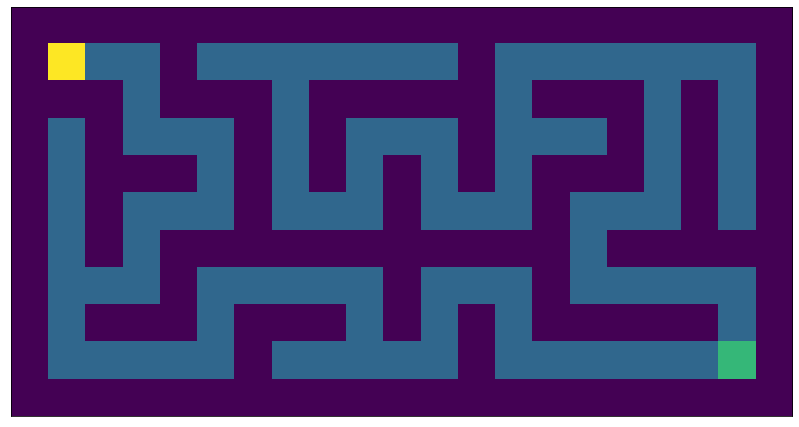

In [6]:
maze.plot()